# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기


# !kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
# !unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [8]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


### 문제 5. 수치형 데이터의 히스토그램 확인하기


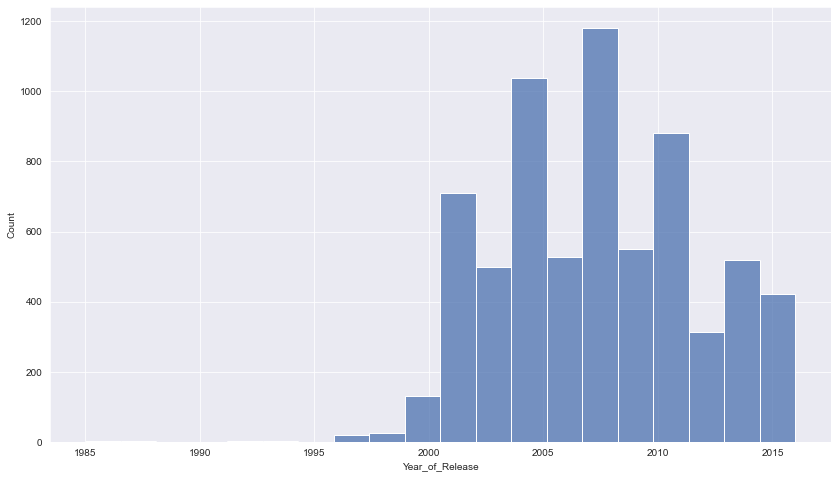

In [10]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인

sns.set({'figure.figsize' : (14, 8)})
sns.histplot(x='Year_of_Release', data=df, bins=20)
plt.show()

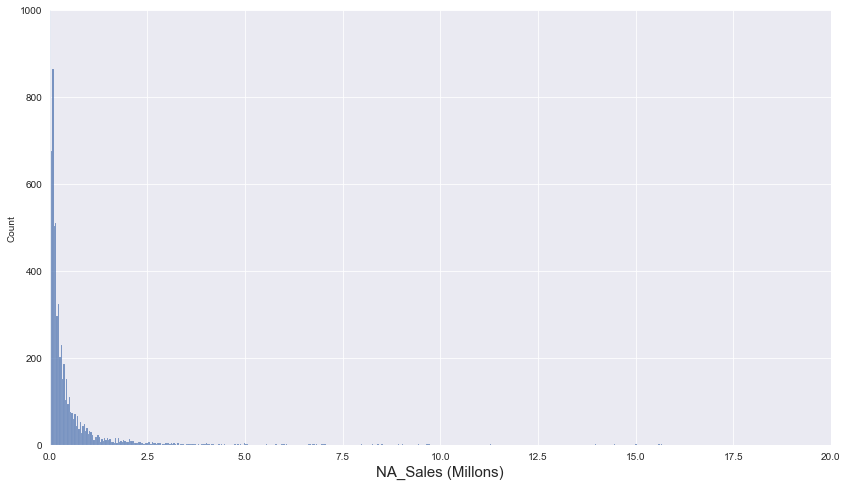

In [11]:
sns.histplot(x='NA_Sales', data=df)
plt.xlim(0, 20)
plt.ylim(0, 1000)
plt.xlabel('NA_Sales (Millons)', fontsize=15)
plt.show()

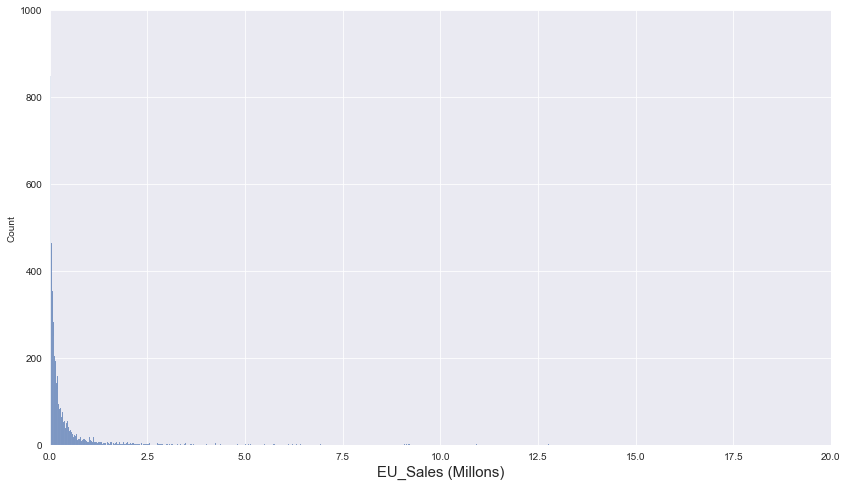

In [12]:
sns.histplot(x='EU_Sales', data=df)
plt.xlim(0, 20)
plt.ylim(0, 1000)
plt.xlabel('EU_Sales (Millons)', fontsize=15)
plt.show()

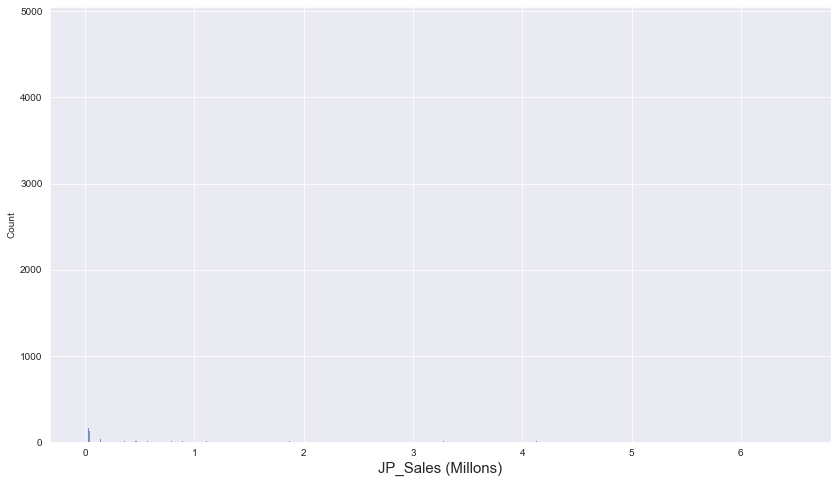

In [13]:
sns.histplot(x='JP_Sales', data=df)
# plt.xlim(0, 20)
# plt.ylim(0, 1000)
plt.xlabel('JP_Sales (Millons)', fontsize=15)
plt.show()

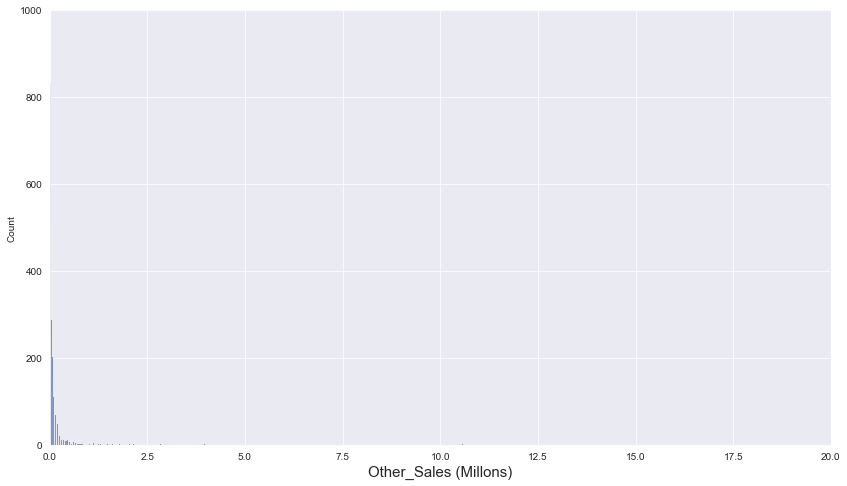

In [14]:
sns.histplot(x='Other_Sales', data=df)
plt.xlim(0, 20)
plt.ylim(0, 1000)
plt.xlabel('Other_Sales (Millons)', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

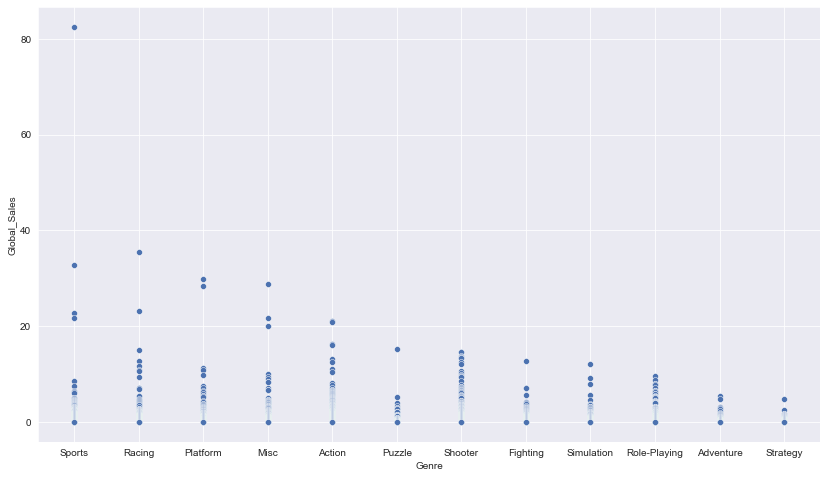

In [15]:
sns.scatterplot(y='Global_Sales', x='Genre', data=df)

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

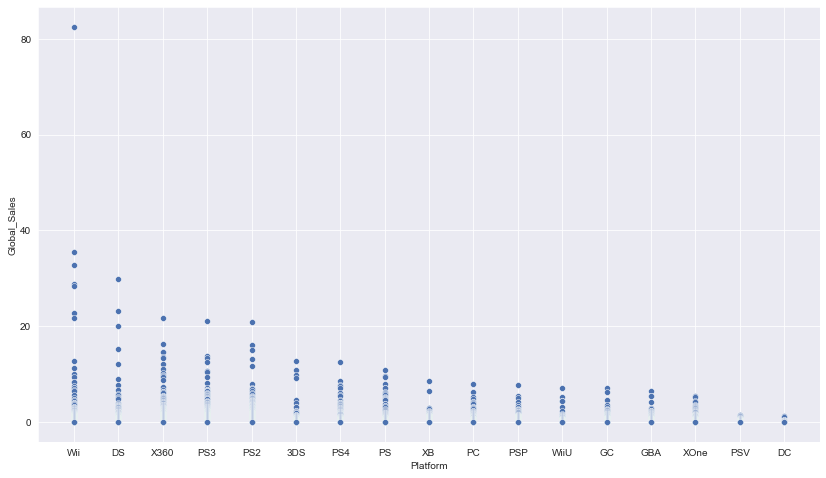

In [16]:
sns.scatterplot(y='Global_Sales', x='Platform', data=df)

<AxesSubplot:xlabel='Global_Sales'>

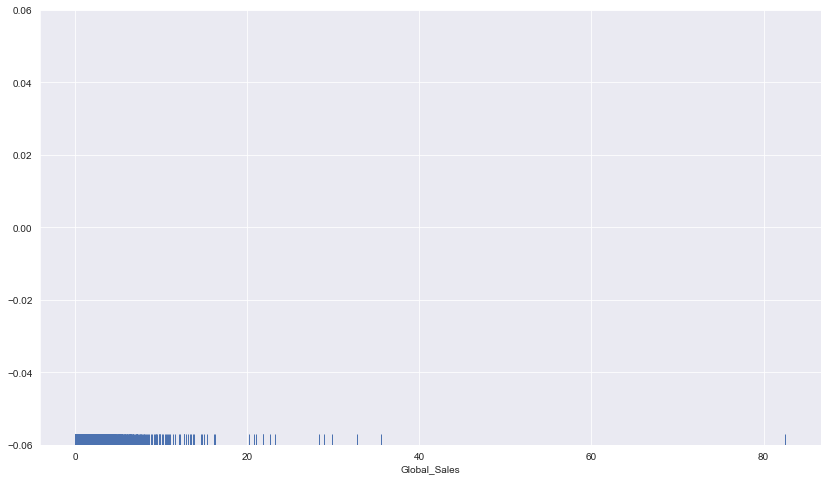

In [17]:
sns.rugplot(x='Global_Sales', data=df) # 80 넘는거 있는 것땜에 히스토그램 이상

In [18]:
df.loc[df['Global_Sales'] >= 30, :] # 닌텐도 Will Sports 엄청 많이 팔림

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [19]:
gs1 = df['Global_Sales'].quantile(0.99) # 너무 큰거 제외

df = df[df['Global_Sales'] < gs1]


<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

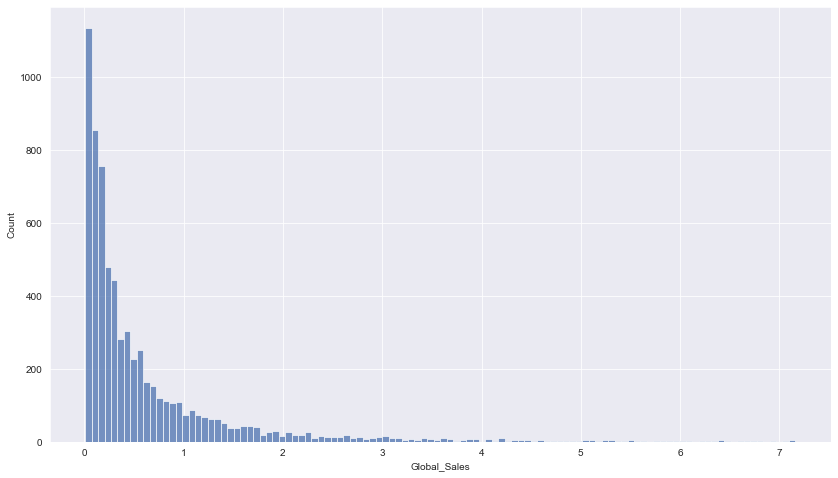

In [20]:
sns.histplot(x='Global_Sales', data=df) # 상위1% 삭제

<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

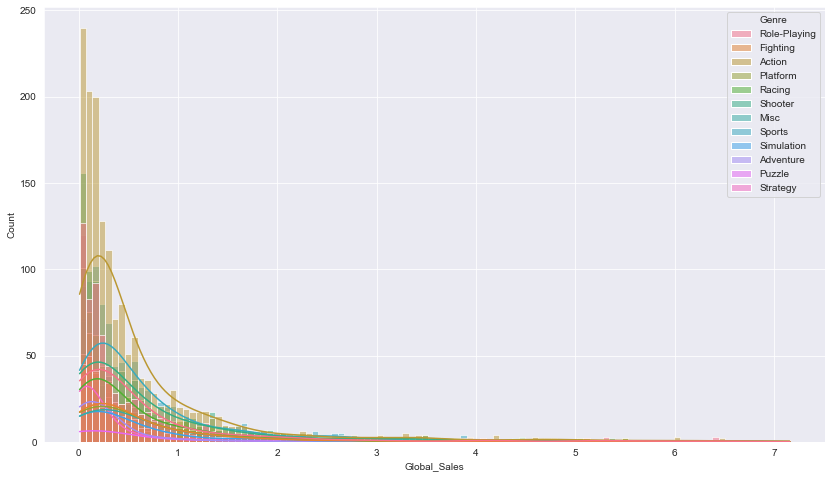

In [21]:
sns.histplot(x='Global_Sales', hue='Genre', kde=True, data=df) # 상위1% 삭제

<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

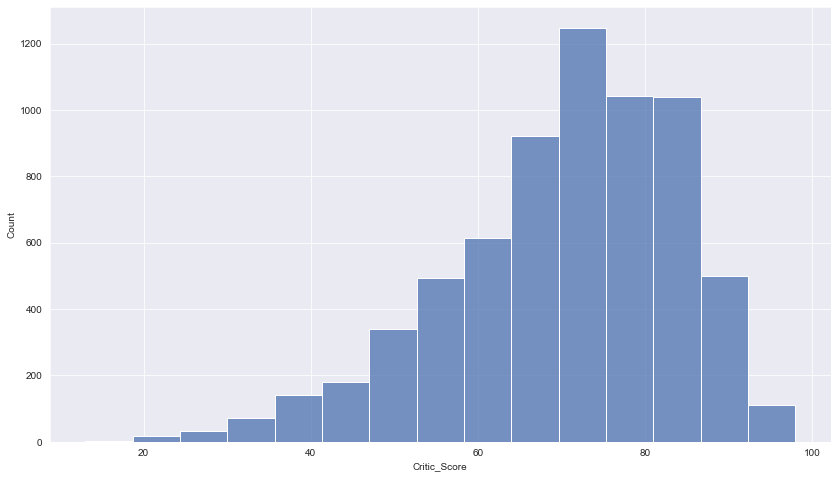

In [22]:
sns.histplot(x='Critic_Score', data=df, bins=15)

<AxesSubplot:xlabel='User_Score', ylabel='Count'>

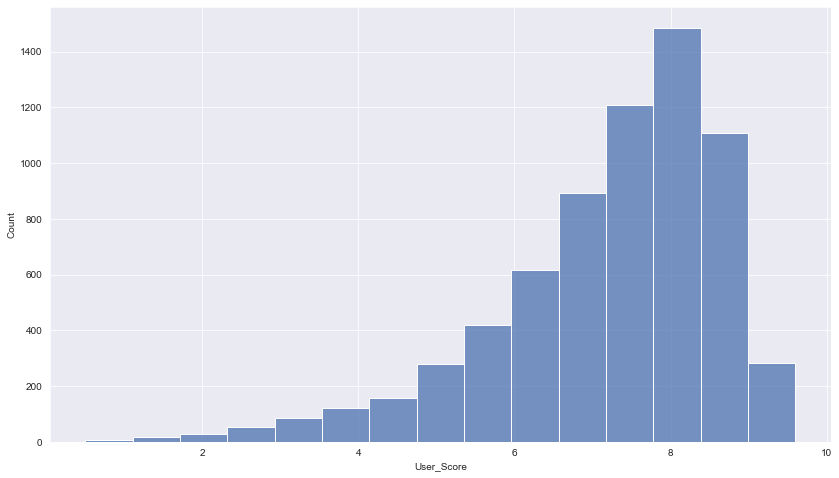

In [23]:
sns.histplot(x=df['User_Score'].apply(float), data=df, bins=15) # Critic보다 점수가 조금 더 후한편??

<AxesSubplot:xlabel='Critic_Count', ylabel='Count'>

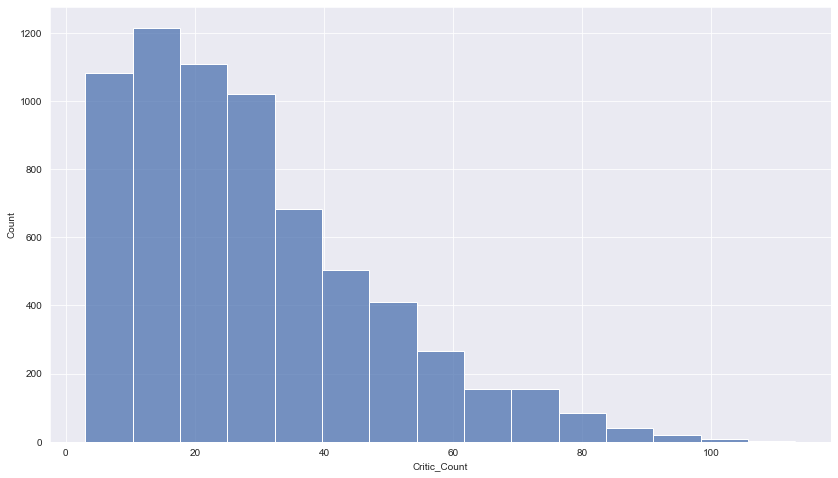

In [24]:
sns.histplot(x='Critic_Count', data=df, bins=15)

<AxesSubplot:xlabel='User_Count', ylabel='Count'>

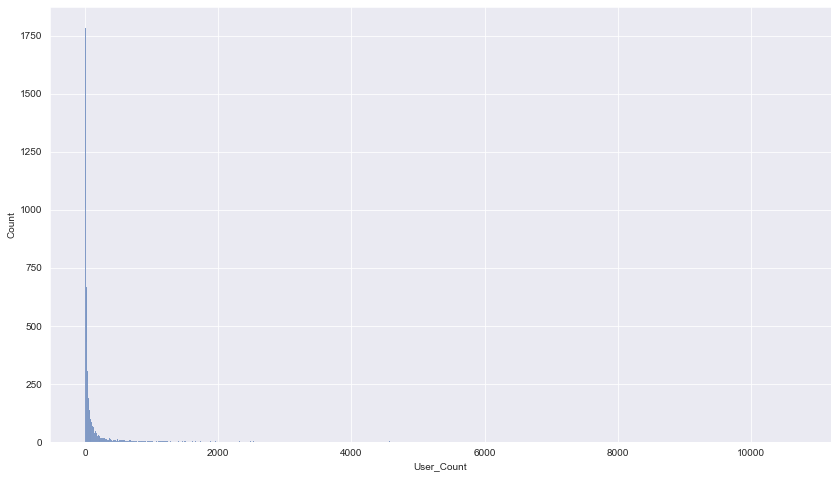

In [25]:
sns.histplot(x='User_Count', data=df)

<AxesSubplot:xlabel='User_Count'>

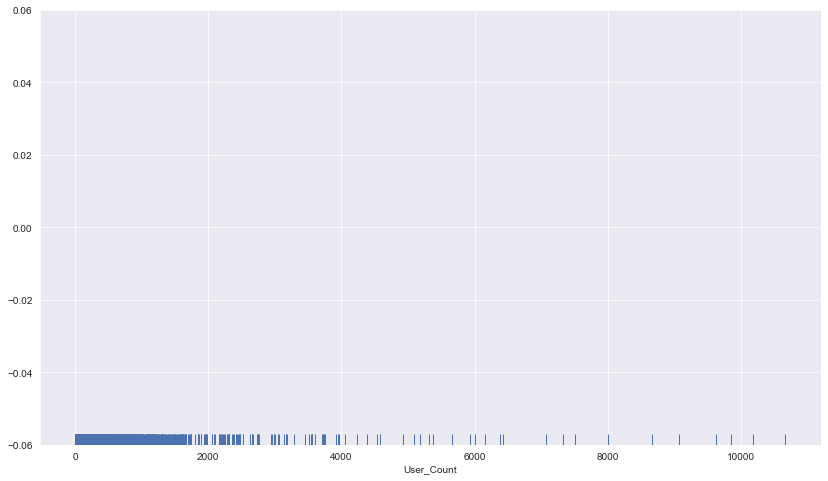

In [26]:
sns.rugplot(x='User_Count', data=df)

In [27]:
# UC 이상치 제거 (상위 5%)

uc1 = df['User_Count'].quantile(0.97)

df = df[df['User_Count'] < uc1]

<AxesSubplot:xlabel='User_Count', ylabel='Count'>

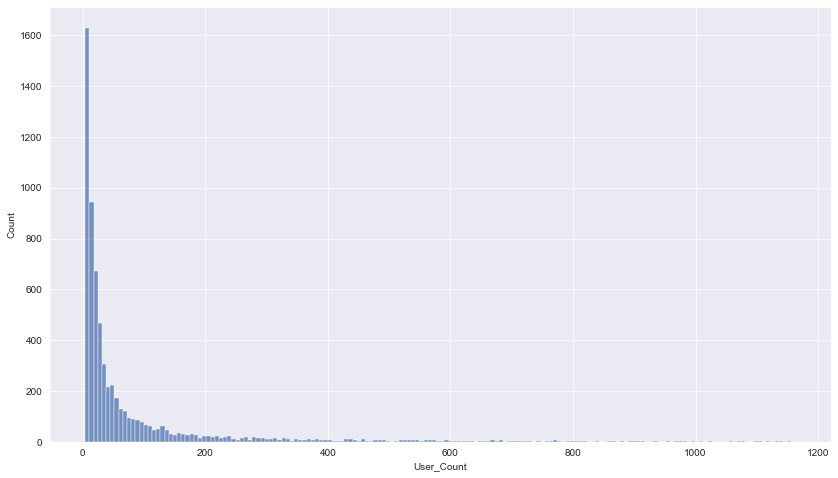

In [28]:
sns.histplot(x='User_Count', data=df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

In [29]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

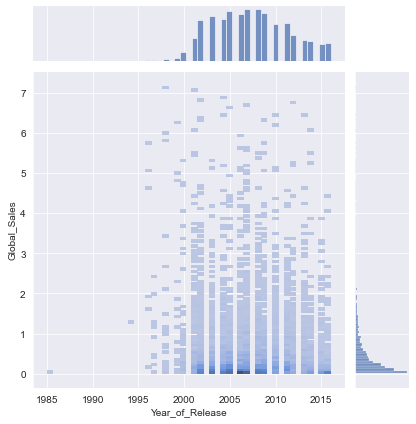

In [30]:
sns.jointplot(x='Year_of_Release', y='Global_Sales', data=df, kind='hist')

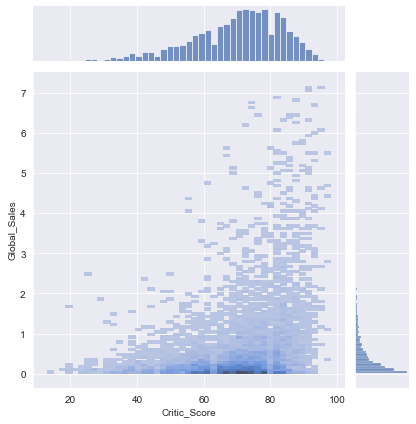

In [31]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist')

# 평이 낮으면 그래도 판매수는 적음
# 평이 좋다고 무조건 많이 팔리는 것은 아님

In [32]:
df['User_Score'] = df['User_Score'].apply(float)

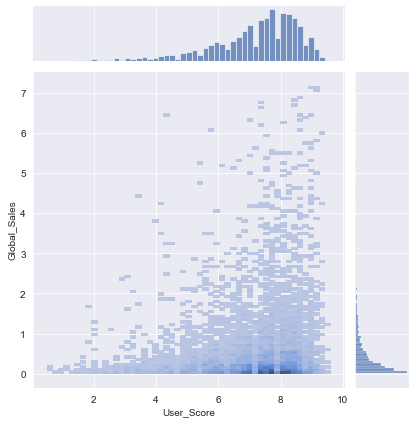

In [33]:
sns.jointplot(x='User_Score', y='Global_Sales', data=df, kind='hist')

# 유저평이 낮으면 그래도 판매수는 적음

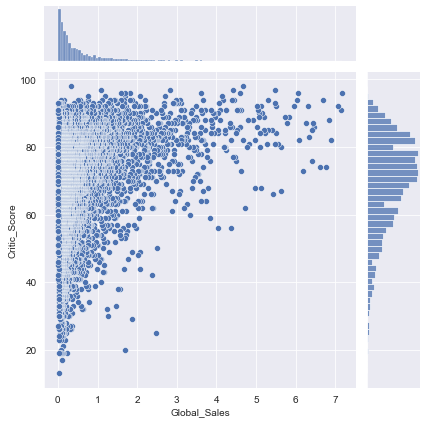

In [34]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석

sns.jointplot(x='Global_Sales', y='Critic_Score', data=df)

## 판매량 적고 비평가 점수 몇개 없을때 높은 경우 많은듯

In [35]:
df.sort_values(by=['Global_Sales', 'Critic_Count'], ascending=[True, False])

# 위에처럼 Global_Sales 작은데 User_Count 작은거 많네

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16624,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,80.0,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+
16656,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.00,0.00,0.01,81.0,46.0,8.5,151.0,Shin'en,E
16130,Guild Wars: Factions,PC,2006.0,Role-Playing,NCSoft,0.00,0.01,0.00,0.00,0.01,84.0,39.0,8.5,128.0,ArenaNet,T
16300,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,75.0,37.0,7.0,112.0,EA Phenomic,T
16150,Codename: Panzers Phase Two,PC,2005.0,Strategy,CDV Software Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,36.0,8.1,15.0,Stormregion,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83,88.0,29.0,8.5,135.0,EA LA,T
113,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,82.0,39.0,8.6,132.0,EA Canada,E
111,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,HAL Labs,T
109,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13,91.0,12.0,8.9,432.0,Naughty Dog,E


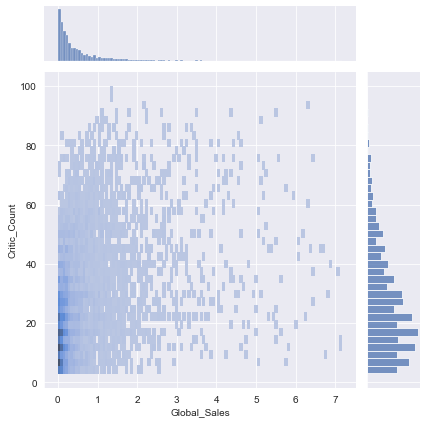

In [36]:
sns.jointplot(x='Global_Sales', y='Critic_Count', data=df, kind='hist')

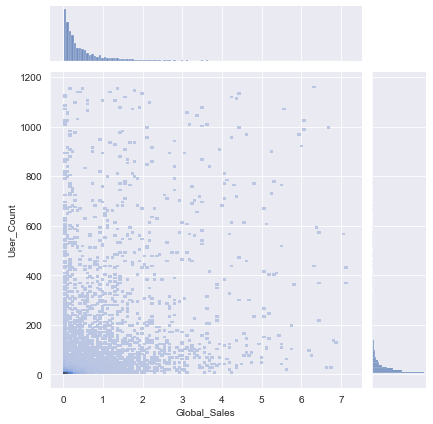

In [37]:
sns.jointplot(x='Global_Sales', y='User_Count', data=df, kind='hist')

# 판매량이 거의 0인데 count가 많은경우도 있네

## user_count & user_score는 Global_Salse와 Data Leackeage가 있다고 보임
# 많이 팔리면 user_count는 많음

In [38]:
df.sort_values(by=['Global_Sales', 'User_Count'], ascending=[True, False])

# 위에처럼 Global_Sales 작은데 User_Count 작은거 많네

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16355,Deus Ex,PC,2000.0,Role-Playing,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,90.0,28.0,9.3,1069.0,Ion Storm,M
16193,Grand Theft Auto III,PC,2002.0,Action,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,93.0,20.0,8.4,805.0,"DMA Design, Rockstar North",M
16624,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,80.0,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16156,The Last Remnant,PC,2009.0,Role-Playing,Square Enix,0.00,0.01,0.00,0.00,0.01,66.0,23.0,8.3,240.0,Square Enix,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83,88.0,29.0,8.5,135.0,EA LA,T
113,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,82.0,39.0,8.6,132.0,EA Canada,E
111,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,HAL Labs,T
109,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13,91.0,12.0,8.9,432.0,Naughty Dog,E


### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

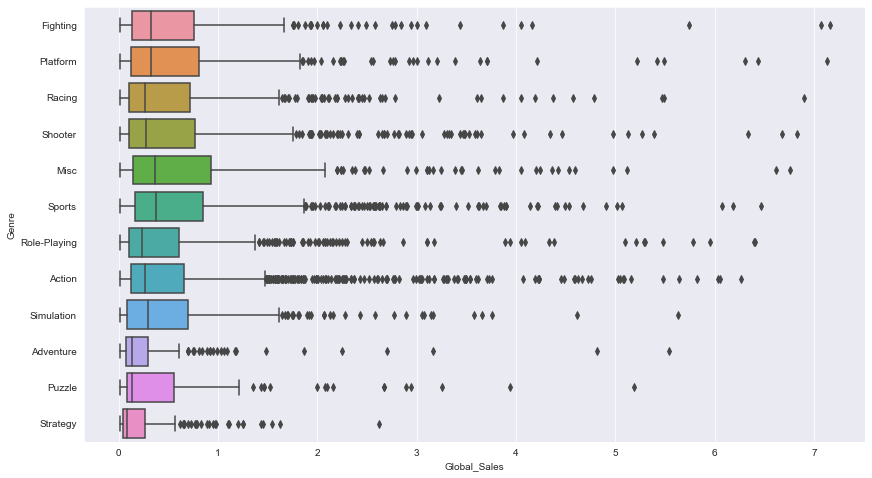

In [39]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석

sns.boxplot(x='Global_Sales', y='Genre',data=df)


In [40]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

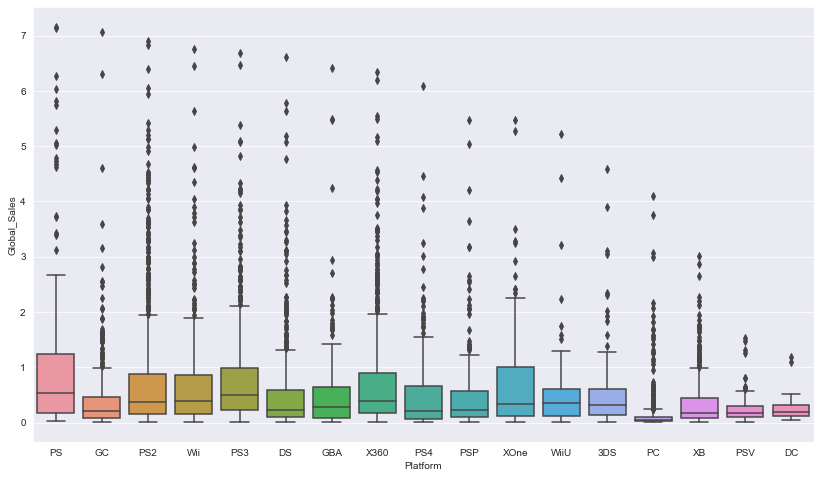

In [41]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석

sns.boxplot(x='Platform', y='Global_Sales', data=df)


### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

In [42]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함

critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [43]:
critic_score['Score'] = critic_score['Score'].map(lambda x: x / 10)

In [44]:
user_score = df[['User_Score']].copy()
user_score.rename({'User_Score' : 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [45]:
user_score

,Score,ScoreBy
106,9.1,Users
109,8.9,Users
111,9.1,Users
113,8.6,Users
114,8.5,Users
...,...,...
16667,2.4,Users
16677,8.8,Users
16696,7.6,Users
16700,5.8,Users


In [46]:
all_score = pd.concat([critic_score, user_score], axis=0, join='outer')

In [47]:
all_score

,Score,ScoreBy
106,9.6,Critics
109,9.1,Critics
111,9.2,Critics
113,8.2,Critics
114,8.8,Critics
...,...,...
16667,2.4,Users
16677,8.8,Users
16696,7.6,Users
16700,5.8,Users


<AxesSubplot:xlabel='ScoreBy', ylabel='Score'>

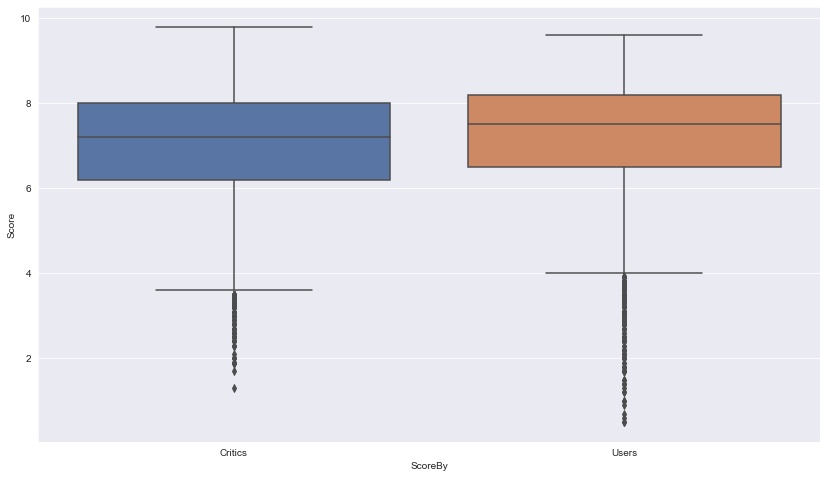

In [48]:
sns.boxplot(y='Score', x='ScoreBy', data=all_score)

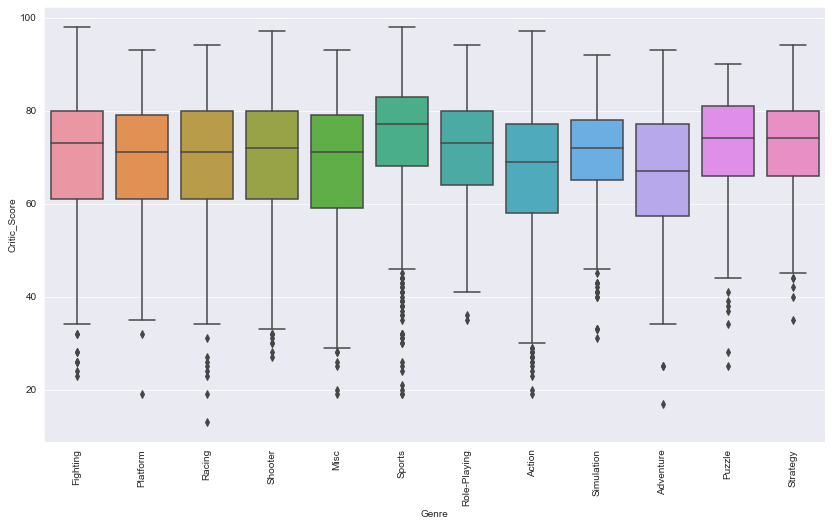

In [49]:
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=90)
plt.show()

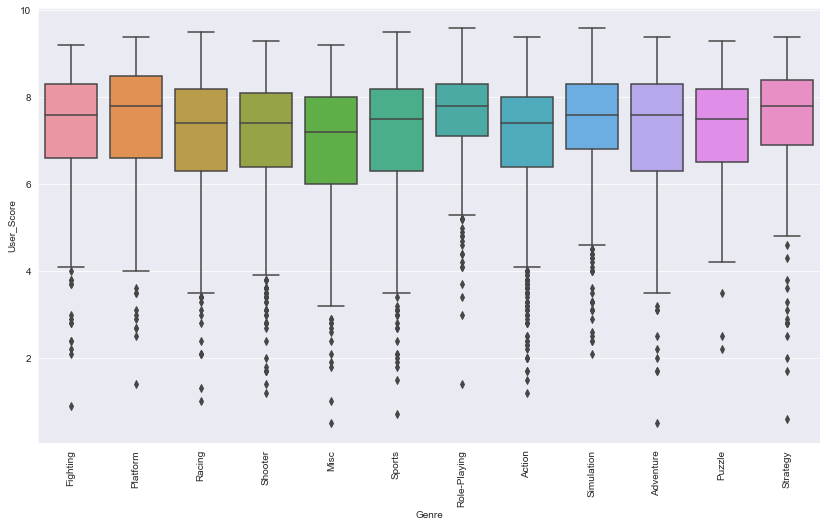

In [50]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

### 문제 9. 수치형 데이터간의 상관성 시각화하기

<AxesSubplot:>

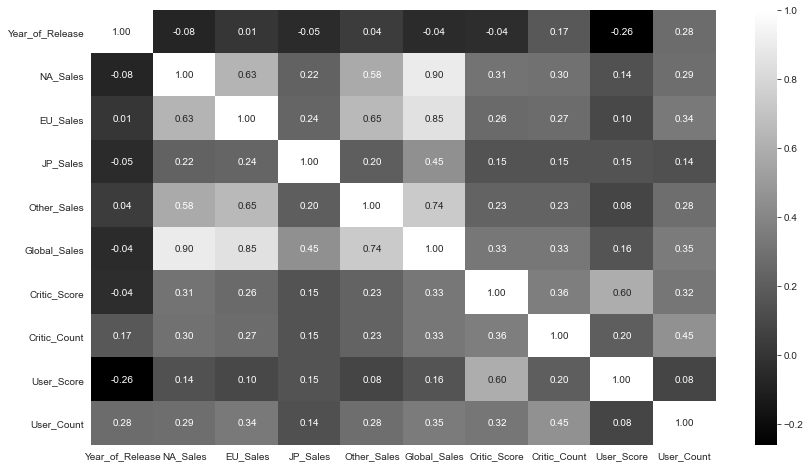

In [51]:
# Correlation Heatmap 시각화하기

sns.heatmap(df.corr(), cmap='gray', annot=True, fmt='.2f')

# 북미 판매량이 많으니까 당연히 높음
# 일본은 상대적으로 상관성이 적음 (판매량 중에)
# user보다 전문가 평점이 더 상관이 많은듯

# 더 최근이면 유저스코어가 낮다 (사용자 눈 높아졌다 ?)

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

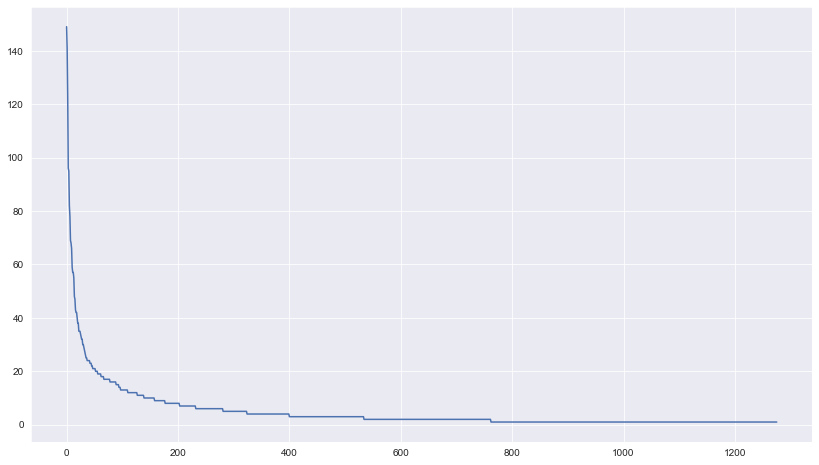

In [52]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인


cat1 = df.Developer.value_counts()

plt.plot(range(len(cat1)), cat1)
plt.show()

In [53]:
cat1[:15]

EA Canada            149
EA Sports            141
Capcom               123
Ubisoft               96
Konami                95
EA Tiburon            82
Ubisoft Montreal      78
Omega Force           69
Visual Concepts       68
Electronic Arts       66
Traveller's Tales     59
Codemasters           57
Vicarious Visions     57
Namco                 55
Yuke's                48
Name: Developer, dtype: int64

In [54]:
df['Developer'] = df['Developer'].apply(lambda x: x if x not in cat1[20:] else 'Others')

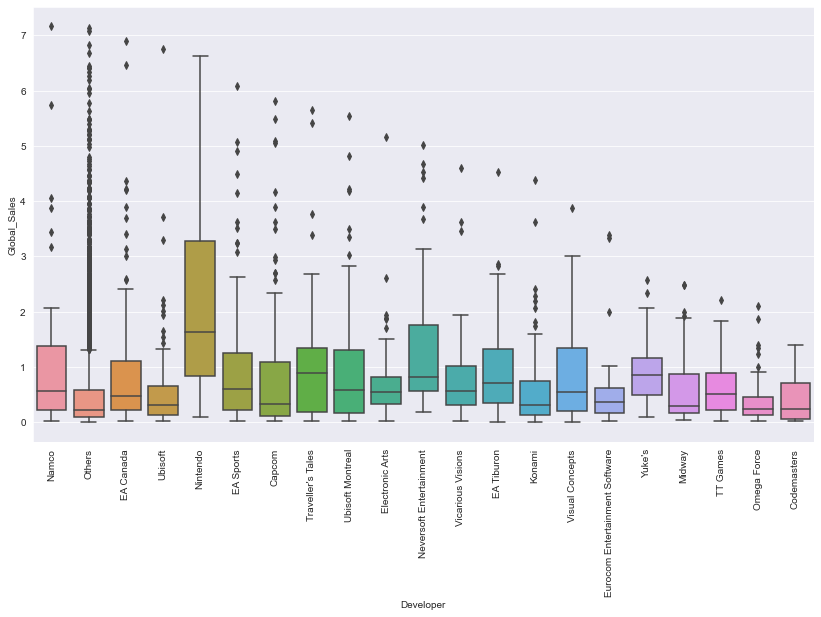

In [55]:
sns.boxplot(x='Developer', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

# 닌텐도가 확실히 제일 잘나감

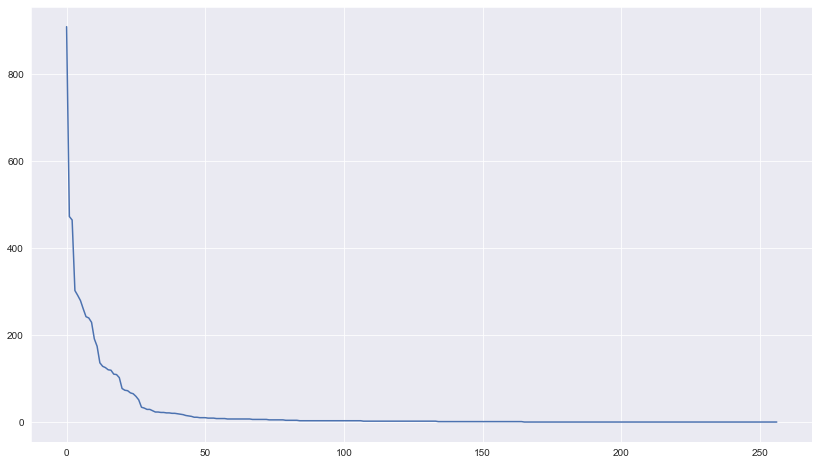

In [56]:
cat2  = df.Publisher.value_counts()

plt.plot(range(len(cat2)), cat2)
plt.show() # 대부분의 게임이 소수의 유통사로인해 출시됨

In [57]:
df['Publisher'] = df['Publisher'].apply(lambda x: x if x not in cat2[20:] else 'Others')

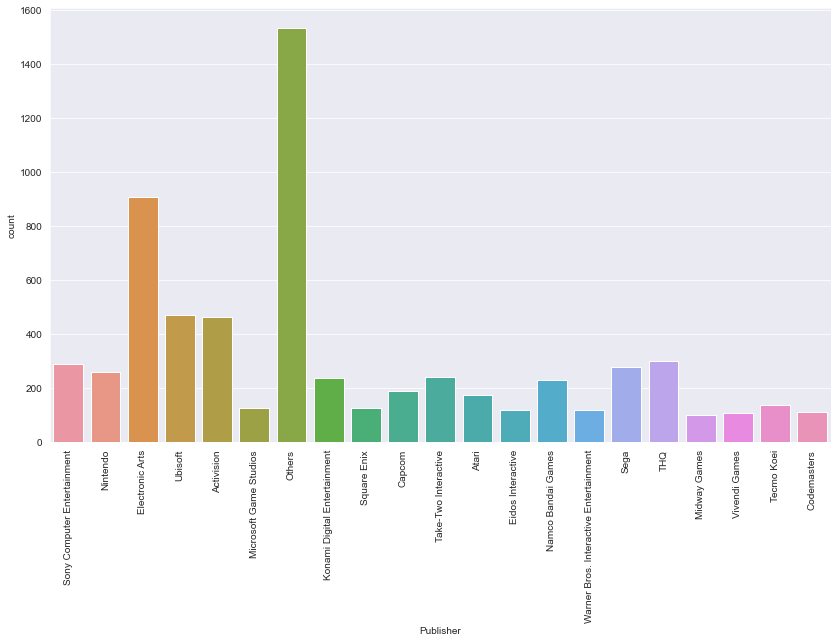

In [58]:
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

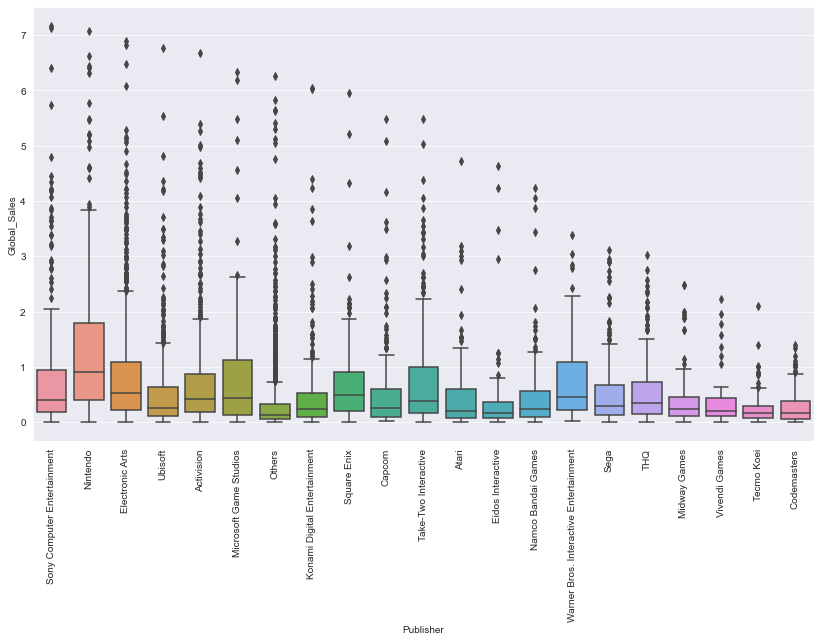

In [59]:
sns.boxplot(x='Publisher', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

# Nintendo 가장 높음
# EA 많음 (sports 많이 출시해서 그런듯)

In [61]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T
109,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13,91.0,12.0,8.9,432.0,Others,E
111,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,Others,T
113,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,82.0,39.0,8.6,132.0,EA Canada,E
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83,88.0,29.0,8.5,135.0,Others,T


### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [75]:
X_cat = df[['Platform', 'Genre', 'Publisher', 'Developer']]

X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)
X_cat_dummies.head()

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Developer_Nintendo,Developer_Omega Force,Developer_Others,Developer_TT Games,Developer_Traveller's Tales,Developer_Ubisoft,Developer_Ubisoft Montreal,Developer_Vicarious Visions,Developer_Visual Concepts,Developer_Yuke's
106,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
111,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
113,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [77]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [78]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

# 사용자관련은 발매 된 후에 측정된 것!! (판매량이랑 연관 강함)

X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = pd.DataFrame(scaler.transform(X_num), index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat_dummies], axis=1)
y = df['Global_Sales']

In [79]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train Shape\n {X_train.shape}')
print(f'X_tesst Shape\n {X_test.shape}')

X_train Shape
 (4587, 70)
X_tesst Shape
 (1966, 70)


### 문제 13. XGBoost 모델 생성/학습하기

In [80]:
from xgboost import XGBRegressor

In [81]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()

model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [82]:
model_xgb.score(X_test, y_test)

0.34184632792779035

### 문제 14. Linear Regression 모델 생성/학습하기

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

model_lr.score(X_test, y_test)

0.27071661414274406

### 문제 15. 모델 학습 결과 평가하기

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [91]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)


print(f'XGB\nRMSE:{sqrt(mean_squared_error(y_test, pred_xgb))}\nMAE:{mean_absolute_error(y_test, pred_xgb)}')
print()
print(f'LinearRegressor\nRMSE:{sqrt(mean_squared_error(y_test, pred_lr))}\nMAE:{mean_absolute_error(y_test, pred_lr)}')


XGB
RMSE:0.73540774840984
MAE:0.417649602688249

LinearRegressor
RMSE:0.7741278767671318
MAE:0.4759780452064184


In [90]:
df['Global_Sales'].describe()

count    6553.000000
mean        0.596936
std         0.868887
min         0.010000
25%         0.110000
50%         0.280000
75%         0.700000
max         7.160000
Name: Global_Sales, dtype: float64

### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


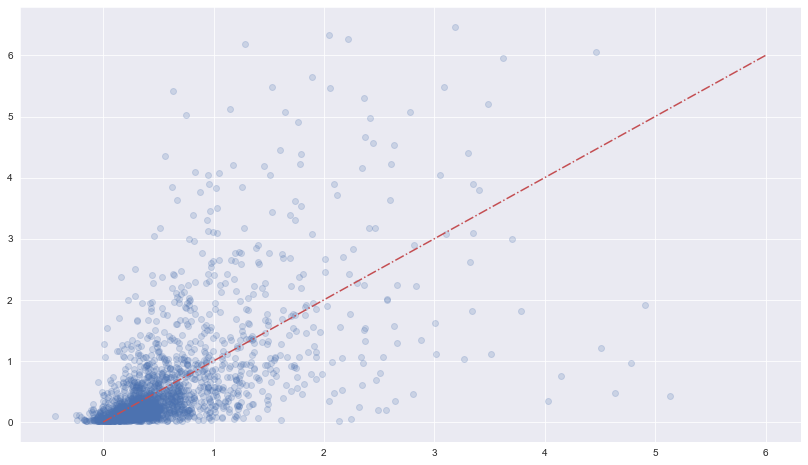

In [95]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기


plt.scatter(x=pred_xgb, y=y_test, alpha=0.2)
plt.plot([0, 6], [0, 6], 'r-.')
plt.show()

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

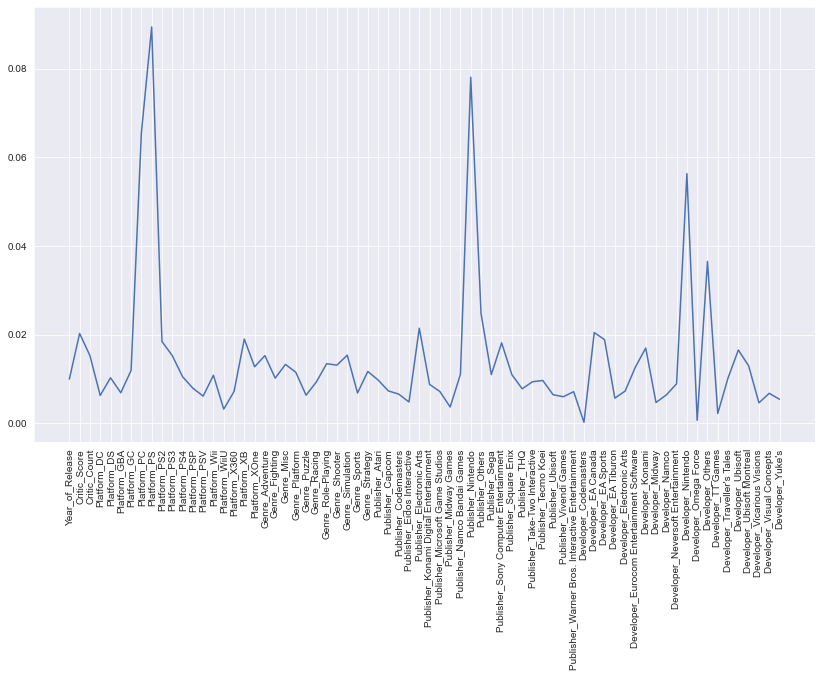

In [106]:
plt.plot(model_xgb.feature_importances_)
plt.xticks(ticks=range(len(X_train.columns)), labels=X_train.columns, rotation=90)
plt.grid('on')
plt.show()


## 영향을 많이 주는 듯!!
# publisher nintendo 
# developer nintendo
# ps2 platform

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [107]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = pd.DataFrame(scaler.transform(X_num), index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat_dummies], axis=1)
y = df['User_Score']

In [108]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train Shape\n {X_train.shape}')
print(f'X_tesst Shape\n {X_test.shape}')

X_train Shape
 (4587, 70)
X_tesst Shape
 (1966, 70)


### 문제 19. XGBoost 모델 생성/학습하기

In [109]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()

model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 문제 20. Linear Regression 모델 생성/학습하기

In [110]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

model_lr.score(X_test, y_test)

0.4629233933590291

### 문제 21. 모델 학습 결과 평가하기

In [111]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)


print(f'XGB\nRMSE:{sqrt(mean_squared_error(y_test, pred_xgb))}\nMAE:{mean_absolute_error(y_test, pred_xgb)}')
print()
print(f'LinearRegressor\nRMSE:{sqrt(mean_squared_error(y_test, pred_lr))}\nMAE:{mean_absolute_error(y_test, pred_lr)}')


XGB
RMSE:1.0732082210586884
MAE:0.7953590896098077

LinearRegressor
RMSE:1.015948019278752
MAE:0.7598966135947451


In [112]:
df.User_Score.describe()

count    6553.000000
mean        7.181215
std         1.430105
min         0.500000
25%         6.500000
50%         7.500000
75%         8.200000
max         9.600000
Name: User_Score, dtype: float64

### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


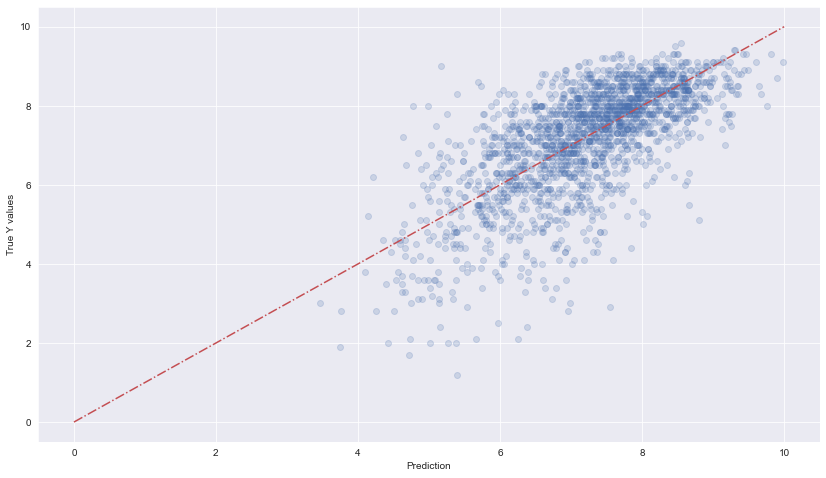

In [117]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기


plt.scatter(x=pred_lr, y=y_test, alpha=0.2)
plt.plot([0, 10], [0, 10], 'r-.')
plt.xlabel('Prediction')
plt.ylabel('True Y values')
plt.show()

### 문제 23. XGBoost 모델의 Feature Importance 시각화하기

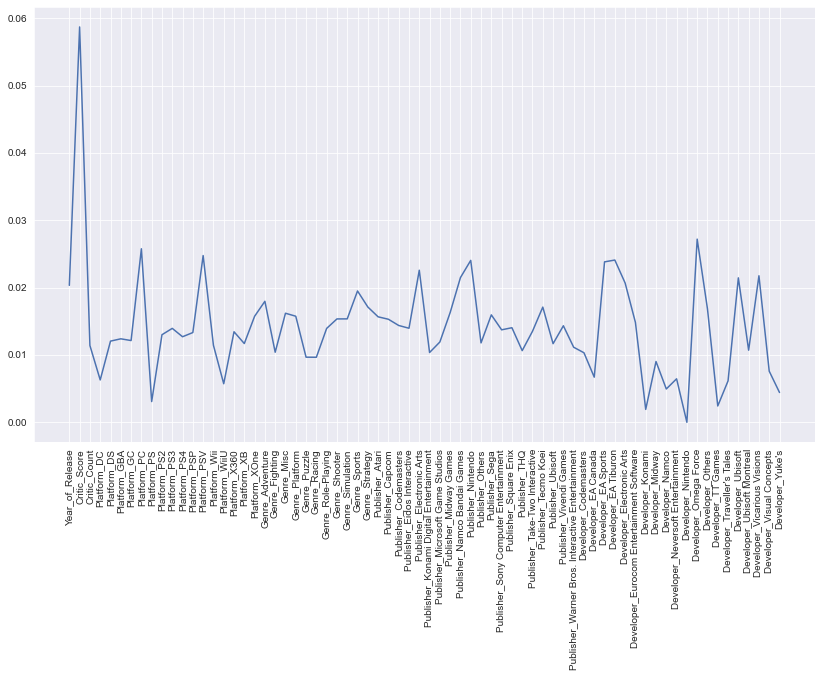

In [118]:
plt.plot(model_xgb.feature_importances_)
plt.xticks(ticks=range(len(X_train.columns)), labels=X_train.columns, rotation=90)
plt.grid('on')
plt.show()

# Critic_Score 영향 큼